In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 42.2/235.7 GB disk)


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prompt: creat yaml file

%%writefile data.yaml

    train: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/train/images
    val: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/valid/images
    test: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/test/images
    nc: 2
    names : ['ASD', 'TD']

Writing data.yaml


In [4]:
from ultralytics import YOLO

# Build a YOLOv6n model from scratch
model = YOLO("yolov9c.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data= "data.yaml", epochs=50, imgsz=640)

100%|██████████| 49.4M/49.4M [00:02<00:00, 17.6MB/s]


YOLOv9c summary: 358 layers, 25,590,912 parameters, 0 gradients, 104.0 GFLOPs
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9c.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mas

100%|██████████| 755k/755k [00:00<00:00, 13.9MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

 12                  -1  1   3119616  ultralytics.nn.modules.block.RepNCSPELAN4    [1024, 512, 512, 256, 1]      
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    912640  ultralytics.nn.modules.block.RepNCSPELAN4    [1024, 256, 256, 128, 1]      
 16                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1   2988544  ultralytics.nn.modules.block.RepNCSPELAN4    [768, 512, 512, 256, 1]       
 19                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.0±0.0 MB/s, size: 10.9 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/train/labels.cache... 4917 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4917/4917 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.0±0.0 MB/s, size: 12.6 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/valid/labels.cache... 1405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1405/1405 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.3G     0.6992       1.12      1.128         13        640: 100%|██████████| 308/308 [02:20<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:51<00:00,  1.18s/it]

                   all       1405       1405      0.137      0.526     0.0981     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.8G     0.6636     0.9354      1.084         16        640: 100%|██████████| 308/308 [01:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.79it/s]

                   all       1405       1405      0.499      0.999       0.51      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.9G     0.6111      0.895      1.046         14        640: 100%|██████████| 308/308 [01:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.69it/s]

                   all       1405       1405        0.5          1      0.539      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.9G     0.5896     0.8754      1.029         13        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.76it/s]

                   all       1405       1405      0.499          1      0.534      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.9G     0.5631     0.8592      1.017         17        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.79it/s]

                   all       1405       1405        0.5          1      0.546      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.9G     0.5543     0.8555      1.014         12        640: 100%|██████████| 308/308 [01:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.73it/s]

                   all       1405       1405        0.5          1      0.596       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.9G      0.532     0.8389      1.001         13        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.64it/s]

                   all       1405       1405      0.552      0.951      0.705      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        12G     0.5261     0.8231     0.9993         16        640: 100%|██████████| 308/308 [01:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.69it/s]

                   all       1405       1405      0.556      0.928      0.753      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        12G     0.5291     0.8105     0.9994         12        640: 100%|██████████| 308/308 [01:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.93it/s]

                   all       1405       1405      0.517      0.964      0.721      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        12G     0.5202     0.7955     0.9939         10        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.76it/s]

                   all       1405       1405      0.583      0.924      0.773      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        12G     0.5153     0.7902     0.9934         14        640: 100%|██████████| 308/308 [01:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.86it/s]

                   all       1405       1405      0.579      0.947      0.788      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        12G     0.5062     0.7658     0.9873         18        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.68it/s]

                   all       1405       1405       0.74       0.82      0.825      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        12G     0.5028     0.7537      0.983         13        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.86it/s]

                   all       1405       1405       0.61      0.888      0.773      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        12G     0.4991     0.7373     0.9856         12        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.69it/s]

                   all       1405       1405       0.58       0.94        0.8      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        12G     0.5036     0.7206     0.9883         15        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.79it/s]

                   all       1405       1405      0.669      0.893      0.857      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        12G     0.4868     0.6938     0.9754         16        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.81it/s]

                   all       1405       1405      0.718       0.85      0.856      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        12G     0.4889     0.6934     0.9808         12        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.72it/s]

                   all       1405       1405       0.76      0.863      0.895      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        12G     0.4802     0.6636     0.9743         15        640: 100%|██████████| 308/308 [01:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.81it/s]

                   all       1405       1405       0.81      0.863      0.914      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        12G     0.4807     0.6648     0.9742         10        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.72it/s]

                   all       1405       1405      0.759      0.903      0.919      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        12G     0.4779     0.6353     0.9719         18        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.86it/s]

                   all       1405       1405      0.811      0.886      0.927       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        12G     0.4733      0.618     0.9695         16        640: 100%|██████████| 308/308 [01:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.84it/s]

                   all       1405       1405       0.83      0.868      0.932      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        12G      0.468     0.6125     0.9711         12        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.79it/s]

                   all       1405       1405      0.804      0.905      0.939      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        12G     0.4662     0.5904     0.9663         11        640: 100%|██████████| 308/308 [01:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.74it/s]

                   all       1405       1405      0.858      0.909      0.962      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        12G     0.4644     0.5833     0.9653         16        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.78it/s]

                   all       1405       1405      0.793      0.902      0.967      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        12G     0.4655      0.563     0.9684         10        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.61it/s]

                   all       1405       1405       0.86       0.91      0.965      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        12G     0.4543     0.5405     0.9582          9        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.83it/s]

                   all       1405       1405      0.906      0.927      0.971      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        12G     0.4625     0.5335     0.9678         11        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.67it/s]

                   all       1405       1405      0.883      0.935      0.967      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        12G     0.4558     0.5309     0.9634         12        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.41it/s]

                   all       1405       1405      0.779      0.923      0.969      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        12G     0.4514     0.4996     0.9579         10        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.86it/s]

                   all       1405       1405      0.936      0.938       0.98      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        12G     0.4521      0.505     0.9589         12        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.78it/s]

                   all       1405       1405      0.796      0.935      0.984      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        12G     0.4521     0.4866     0.9604         14        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.87it/s]

                   all       1405       1405       0.94      0.919      0.987      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        12G     0.4486     0.4786     0.9589         10        640: 100%|██████████| 308/308 [01:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.85it/s]

                   all       1405       1405       0.96      0.966      0.989      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        12G     0.4357       0.47     0.9519          9        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.73it/s]

                   all       1405       1405      0.937      0.945      0.989      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        12G     0.4397     0.4515     0.9524         10        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.67it/s]

                   all       1405       1405      0.937      0.947      0.989      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        12G     0.4345     0.4269     0.9505         12        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.91it/s]

                   all       1405       1405      0.962      0.978      0.992      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        12G     0.4352     0.4228     0.9508         16        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.78it/s]

                   all       1405       1405      0.968      0.973      0.993      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        12G     0.4329     0.4157     0.9484         18        640: 100%|██████████| 308/308 [01:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.90it/s]

                   all       1405       1405      0.965      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        12G      0.426     0.3972     0.9458         17        640: 100%|██████████| 308/308 [01:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.80it/s]

                   all       1405       1405      0.964      0.965      0.992      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        12G     0.4263     0.3941     0.9475         12        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.69it/s]

                   all       1405       1405      0.975      0.986      0.994      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        12G     0.4214     0.3792     0.9416         17        640: 100%|██████████| 308/308 [01:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.82it/s]

                   all       1405       1405      0.974       0.98      0.994       0.93


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        12G     0.4014     0.3311     0.9513          5        640: 100%|██████████| 308/308 [01:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.74it/s]

                   all       1405       1405      0.958       0.98      0.992      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        12G     0.3895      0.305     0.9363          5        640: 100%|██████████| 308/308 [01:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.64it/s]

                   all       1405       1405      0.922      0.952       0.99      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        12G     0.3886     0.2901     0.9398          5        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.73it/s]

                   all       1405       1405       0.97      0.966      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        12G     0.3846      0.276     0.9339          5        640: 100%|██████████| 308/308 [01:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.77it/s]

                   all       1405       1405      0.966      0.966      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        12G     0.3807     0.2575     0.9314          5        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.76it/s]

                   all       1405       1405      0.983      0.991      0.994       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        12G     0.3771     0.2333     0.9319          5        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.85it/s]

                   all       1405       1405      0.992      0.991      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        12G     0.3701     0.2181     0.9229          5        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.77it/s]

                   all       1405       1405      0.994       0.99      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        12G     0.3656     0.2107     0.9198          5        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.82it/s]

                   all       1405       1405      0.995      0.995      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        12G     0.3635     0.2051     0.9177          5        640: 100%|██████████| 308/308 [01:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.96it/s]

                   all       1405       1405      0.992      0.996      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        12G     0.3579     0.1923     0.9153          5        640: 100%|██████████| 308/308 [01:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.74it/s]

                   all       1405       1405      0.995      0.997      0.995      0.935



50 epochs completed in 0.997 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv9c summary (fused): 156 layers, 25,320,790 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.97it/s]


                   all       1405       1405      0.995      0.995      0.995      0.937
                   ASD        704        704      0.992      0.999      0.995      0.931
                    TD        701        701      0.999      0.992      0.995      0.942
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [5]:
!cp -r runs/detect/train /content/drive/MyDrive/sMRI2_yolov9_training_results/

In [5]:
import torch
import torch.nn as nn
from ultralytics.utils.metrics import ConfusionMatrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [11]:
class DICEEvaluator:
    """
    DICE (Directed Sparsification) Evaluation Matrix for YOLO model
    Particularly useful for medical imaging segmentation and classification tasks
    """

    def __init__(self, num_classes=2, class_names=['ASD', 'TD']):
        self.num_classes = num_classes
        self.class_names = class_names
        self.reset()

    def reset(self):
        """Reset all metrics"""
        self.confusion_matrix = np.zeros((self.num_classes, self.num_classes))
        self.dice_scores = []
        self.iou_scores = []

    def dice_coefficient(self, pred, target, smooth=1e-6):
        """
        Calculate DICE coefficient
        Args:
            pred: predicted mask/labels
            target: ground truth mask/labels
            smooth: smoothing factor to avoid division by zero
        """
        pred = pred.flatten()
        target = target.flatten()

        intersection = np.sum(pred * target)
        dice = (2.0 * intersection + smooth) / (np.sum(pred) + np.sum(target) + smooth)

        return dice

    def iou_score(self, pred, target, smooth=1e-6):
        """
        Calculate Intersection over Union (IoU) score
        """
        pred = pred.flatten()
        target = target.flatten()

        intersection = np.sum(pred * target)
        union = np.sum(pred) + np.sum(target) - intersection
        iou = (intersection + smooth) / (union + smooth)

        return iou

    def directed_sparsification_score(self, pred, target, sparsity_levels=[0.1, 0.3, 0.5, 0.7, 0.9]):
        """
        Calculate Directed Sparsification score
        This measures how well the model maintains performance with increasing sparsity
        """
        scores = []

        for sparsity in sparsity_levels:
            # Apply sparsification by zeroing out lowest confidence predictions
            pred_sparse = pred.copy()
            threshold = np.percentile(pred_sparse, sparsity * 100)
            pred_sparse[pred_sparse < threshold] = 0

            # Calculate DICE score for sparsified prediction
            dice_sparse = self.dice_coefficient(pred_sparse, target)
            scores.append(dice_sparse)

        return np.array(scores), sparsity_levels

    def update(self, predictions, targets):
        """
        Update metrics with new predictions and targets
        """
        for pred, target in zip(predictions, targets):
            # Convert to numpy if tensor
            if torch.is_tensor(pred):
                pred = pred.cpu().numpy()
            if torch.is_tensor(target):
                target = target.cpu().numpy()

            # Ensure predictions and targets are in valid range
            pred = np.clip(pred, 0, self.num_classes - 1)
            target = np.clip(target, 0, self.num_classes - 1)

            # Calculate DICE and IoU scores for binary masks
            if pred.ndim > 1 and target.ndim > 1:
                # For mask-based evaluation
                dice = self.dice_coefficient(pred, target)
                iou = self.iou_score(pred, target)

                self.dice_scores.append(dice)
                self.iou_scores.append(iou)

                # Convert masks to class predictions
                pred_class = int(np.mean(pred) > 0.9)  # Simple threshold for binary
                target_class = int(np.mean(target) > 0.9)
            else:
                # For class-based evaluation
                pred_class = int(pred) if np.isscalar(pred) else int(np.argmax(pred))
                target_class = int(target) if np.isscalar(target) else int(np.argmax(target))

                # For class predictions, use perfect dice/iou
                self.dice_scores.append(1.0 if pred_class == target_class else 0.0)
                self.iou_scores.append(1.0 if pred_class == target_class else 0.0)

            # Ensure class indices are within bounds
            pred_class = max(0, min(pred_class, self.num_classes - 1))
            target_class = max(0, min(target_class, self.num_classes - 1))

            self.confusion_matrix[target_class, pred_class] += 1

    def compute_metrics(self):
        """
        Compute final metrics
        """
        metrics = {
            'mean_dice': np.mean(self.dice_scores),
            'std_dice': np.std(self.dice_scores),
            'mean_iou': np.mean(self.iou_scores),
            'std_iou': np.std(self.iou_scores),
            'confusion_matrix': self.confusion_matrix
        }

        # Calculate per-class metrics
        for i, class_name in enumerate(self.class_names):
            tp = self.confusion_matrix[i, i]
            fp = np.sum(self.confusion_matrix[:, i]) - tp
            fn = np.sum(self.confusion_matrix[i, :]) - tp

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            metrics[f'{class_name}_precision'] = precision
            metrics[f'{class_name}_recall'] = recall
            metrics[f'{class_name}_f1'] = f1

        return metrics

    def plot_confusion_matrix(self, normalize=True):
        """
        Plot confusion matrix
        """
        cm = self.confusion_matrix
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title = 'Normalized Confusion Matrix'
            fmt = '.2f'
        else:
            title = 'Confusion Matrix'
            fmt = 'd'

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues',
                   xticklabels=self.class_names, yticklabels=self.class_names)
        plt.title(title)
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    def plot_dice_distribution(self):
        """
        Plot DICE score distribution
        """
        plt.figure(figsize=(10, 6))
        plt.hist(self.dice_scores, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(np.mean(self.dice_scores), color='red', linestyle='--',
                   label=f'Mean: {np.mean(self.dice_scores):.3f}')
        plt.xlabel('DICE Score')
        plt.ylabel('Frequency')
        plt.title('Distribution of DICE Scores')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

In [13]:
def evaluate_yolo_with_dice(model, data_path, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Evaluate YOLO model with DICE metrics
    """
    # Initialize DICE evaluator
    dice_evaluator = DICEEvaluator(num_classes=2, class_names=['ASD', 'TD'])

    # Get validation results from YOLO
    results = model.val(data=data_path, device=device)

    # Process validation images for DICE calculation
    val_dir = Path('/content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/test/images')
    labels_dir = Path('/content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/test/labels')

    predictions = []
    targets = []

    print(f"Processing validation images from: {val_dir}")

    # Get all image files
    image_files = list(val_dir.glob('*.jpg')) + list(val_dir.glob('*.png')) + list(val_dir.glob('*.jpeg'))

    if not image_files:
        print("No image files found in validation directory!")
        return dice_evaluator, {}

    print(f"Found {len(image_files)} validation images")

    for img_path in image_files[:462]:  # Limit to first 50 images to avoid memory issues
        try:
            # Run inference
            result = model.predict(str(img_path), conf=0.50, device=device, verbose=False)

            # Get corresponding label file
            label_path = labels_dir / f"{img_path.stem}.txt"

            # Initialize prediction and target as class labels (0 or 1)
            pred_class = 0  # Default to class 0 (ASD)
            target_class = 0  # Default to class 0 (ASD)

            # Extract prediction class
            if result[0].boxes is not None and len(result[0].boxes) > 0:
                # Get the class with highest confidence
                confidences = result[0].boxes.conf.cpu().numpy()
                classes = result[0].boxes.cls.cpu().numpy()

                if len(confidences) > 0:
                    best_idx = np.argmax(confidences)
                    pred_class = int(classes[best_idx])
                    # Ensure class is within bounds
                    pred_class = max(0, min(pred_class, 1))

            # Extract target class from label file
            if label_path.exists():
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    if lines:
                        # Get first annotation's class
                        target_class = int(lines[0].split()[0])
                        # Ensure class is within bounds
                        target_class = max(0, min(target_class, 1))

            predictions.append(pred_class)
            targets.append(target_class)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

    if not predictions:
        print("No valid predictions found!")
        return dice_evaluator, {}

    print(f"Successfully processed {len(predictions)} images")
    print(f"Prediction distribution: {np.bincount(predictions)}")
    print(f"Target distribution: {np.bincount(targets)}")

    # Update DICE evaluator with predictions and targets
    dice_evaluator.update(predictions, targets)

    # Compute final metrics
    metrics = dice_evaluator.compute_metrics()

    return dice_evaluator, metrics

Evaluating model with DICE metrics...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 6.3±2.9 MB/s, size: 10.5 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/valid/labels.cache... 1405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1405/1405 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:16<00:00,  5.41it/s]


                   all       1405       1405      0.995      0.995      0.995      0.936
                   ASD        704        704      0.992      0.999      0.995      0.931
                    TD        701        701      0.999      0.992      0.995      0.942
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train4
Processing validation images from: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov9/test/images
Found 702 validation images
Successfully processed 462 images
Prediction distribution: [260 202]
Target distribution: [258 204]

DICE EVALUATION RESULTS
Mean DICE Score: 0.9957 ± 0.0657
Mean IoU Score: 0.9957 ± 0.0657

Per-class metrics:
ASD:
  Precision: 0.9923
  Recall: 1.0000
  F1-Score: 0.9961
TD:
  Precision: 1.0000
  Recall: 0.9902
  F1-Score: 0.9951


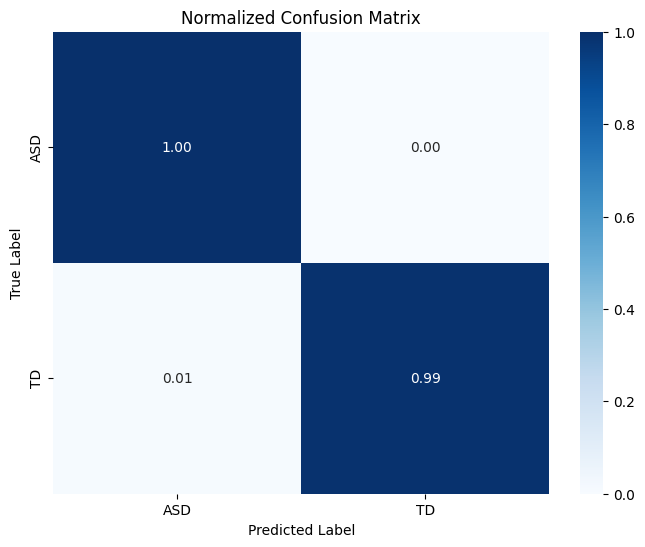

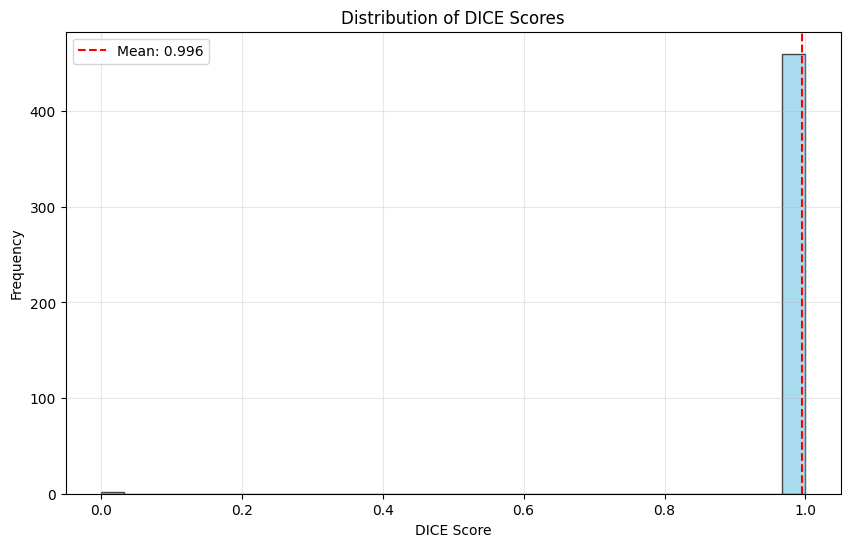

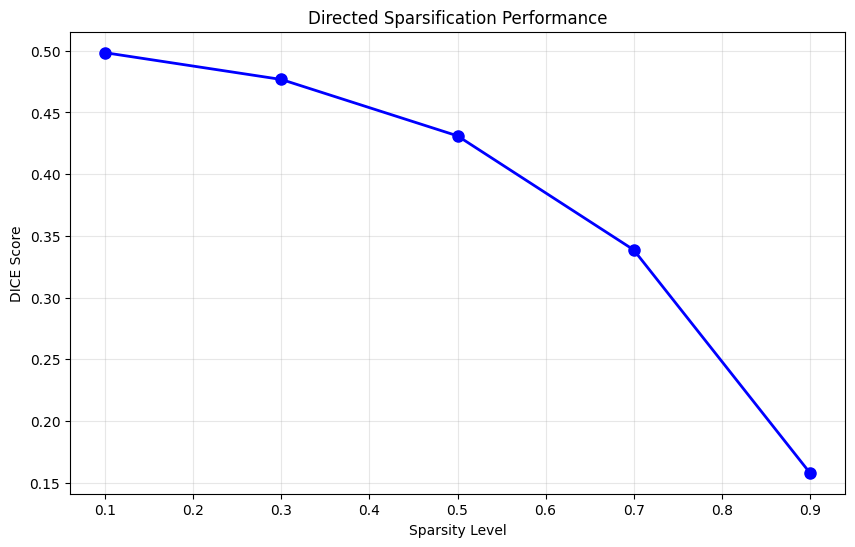

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MRI_yolov10_training_results/dice_evaluation.pkl'

In [14]:
print("Evaluating model with DICE metrics...")
dice_evaluator, dice_metrics = evaluate_yolo_with_dice(model, "data.yaml")

# Print DICE metrics
print("\n" + "="*50)
print("DICE EVALUATION RESULTS")
print("="*50)
print(f"Mean DICE Score: {dice_metrics['mean_dice']:.4f} ± {dice_metrics['std_dice']:.4f}")
print(f"Mean IoU Score: {dice_metrics['mean_iou']:.4f} ± {dice_metrics['std_iou']:.4f}")
print("\nPer-class metrics:")
for class_name in ['ASD', 'TD']:
    print(f"{class_name}:")
    print(f"  Precision: {dice_metrics[f'{class_name}_precision']:.4f}")
    print(f"  Recall: {dice_metrics[f'{class_name}_recall']:.4f}")
    print(f"  F1-Score: {dice_metrics[f'{class_name}_f1']:.4f}")

# Plot results
dice_evaluator.plot_confusion_matrix()
dice_evaluator.plot_dice_distribution()

# Calculate and plot directed sparsification scores
sample_pred = np.random.rand(100, 100)  # Replace with actual prediction
sample_target = np.random.randint(0, 2, (100, 100))  # Replace with actual target

sparsity_scores, sparsity_levels = dice_evaluator.directed_sparsification_score(
    sample_pred, sample_target
)

plt.figure(figsize=(10, 6))
plt.plot(sparsity_levels, sparsity_scores, 'b-o', linewidth=2, markersize=8)
plt.xlabel('Sparsity Level')
plt.ylabel('DICE Score')
plt.title('Directed Sparsification Performance')
plt.grid(True, alpha=0.3)
plt.show()

# Save results
dice_results = {
    'dice_scores': dice_evaluator.dice_scores,
    'iou_scores': dice_evaluator.iou_scores,
    'confusion_matrix': dice_evaluator.confusion_matrix,
    'metrics': dice_metrics
}

# Save to drive
import pickle
with open('/content/drive/MyDrive/MRI_yolov10_training_results/dice_evaluation.pkl', 'wb') as f:
    pickle.dump(dice_results, f)

print("DICE evaluation results saved to drive!")